In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('..\\data\\AmesHousing.csv')

In [5]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
df.shape

(2930, 82)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
nunique_sorted = df.nunique().sort_values(ascending=False)

print(nunique_sorted.head(20))

Order             2930
PID               2930
Lot Area          1960
Gr Liv Area       1292
Bsmt Unf SF       1137
1st Flr SF        1083
Total Bsmt SF     1058
SalePrice         1032
BsmtFin SF 1       995
2nd Flr SF         635
Garage Area        603
Mas Vnr Area       445
Wood Deck SF       380
BsmtFin SF 2       274
Open Porch SF      252
Enclosed Porch     183
Lot Frontage       128
Screen Porch       121
Year Built         118
Garage Yr Blt      103
dtype: int64


In [9]:
# remove 'Order' and 'PID' columns from DataFrame
df.drop(['Order', 'PID'], axis=1, inplace=True)

## Handling Missing Data and Low-Information Features

In [10]:
# calculate percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Cond        5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Garage Yr Blt      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
Garage Cars        0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
BsmtFin SF 1       0.034130
Electrical         0.034130
dtype: float64


In [11]:
# delete columns with 40% or more missing values
columns_to_drop = missing_percentage[missing_percentage >= 40].index
df = df.drop(columns=columns_to_drop)

In [12]:
# calculate percentage of zero values for each column
zero_percentage = (df == 0).mean() * 100
zero_percentage_sorted = zero_percentage.sort_values(ascending=False) 

print(zero_percentage_sorted.head(20))

Pool Area          99.556314
3Ssn Porch         98.737201
Low Qual Fin SF    98.634812
Misc Val           96.484642
Bsmt Half Bath     93.959044
Screen Porch       91.262799
BsmtFin SF 2       87.986348
Enclosed Porch     84.334471
Half Bath          62.901024
Mas Vnr Area       59.658703
Bsmt Full Bath     58.259386
2nd Flr SF         57.269625
Wood Deck SF       52.081911
Fireplaces         48.532423
Open Porch SF      44.368601
BsmtFin SF 1       31.740614
Bsmt Unf SF         8.327645
Garage Area         5.358362
Garage Cars         5.358362
Total Bsmt SF       2.696246
dtype: float64


In [13]:
df.groupby('Pool Area').size()

Pool Area
0      2917
144       1
228       1
368       1
444       1
480       1
512       1
519       1
555       1
561       1
576       1
648       1
738       1
800       1
dtype: int64

In [14]:
# drop 'Pool Area' column from the DataFrame
df = df.drop(['Pool Area'], axis=1)

In [15]:
# find all column names that contain the word 'porch' (case insensitive)
porch_columns  = [col for col in df.columns if 'porch' in col.lower()]

print(porch_columns)

['Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']


In [16]:
# create new column 'Total Porch SF' by summing all 'porch' columns row-wise
df['Total Porch SF'] = df[porch_columns].sum(axis=1)
df = df.drop(columns=porch_columns)

In [17]:
df.groupby('Low Qual Fin SF').size()

Low Qual Fin SF
0       2890
53         1
80         4
108        1
114        1
120        1
140        1
144        1
156        1
205        2
232        1
234        1
259        1
312        1
360        2
362        1
371        1
384        1
390        1
392        1
397        1
420        1
431        1
436        1
450        1
473        1
479        1
481        1
512        1
513        1
514        1
515        1
528        1
572        1
697        1
1064       1
dtype: int64

In [18]:
# drop 'Low Qual Fin SF' column from the DataFrame
df = df.drop(['Low Qual Fin SF'], axis=1)

In [19]:
df.groupby('Misc Val').size()

Misc Val
0        2827
54          1
80          1
300         1
350         1
400        18
420         1
450         9
455         1
460         1
480         2
490         1
500        13
560         1
600         8
620         1
650         3
700         7
750         1
800         1
900         1
1000        1
1150        1
1200        3
1300        1
1400        1
1500        3
1512        1
2000        7
2500        2
3000        2
3500        1
4500        2
6500        1
8300        1
12500       1
15500       1
17000       1
dtype: int64

In [20]:
# drop 'Misc Val' column from the DataFrame
df = df.drop(['Misc Val'], axis=1)

In [21]:
# drop 'Bsmt Half Bath' and 'Bsmt Full Bath' columns from the DataFrame
df = df.drop(['Bsmt Half Bath', 'Bsmt Full Bath'], axis=1)

In [22]:
# create new column 'Total BsmtFin SF' by summing 'BsmtFin SF 1' and 'BsmtFin SF 2'
df['Total BsmtFin SF'] = df['BsmtFin SF 1'] + df['BsmtFin SF 2']

# drop the original 'BsmtFin SF 1' and 'BsmtFin SF 2' columns from the DataFrame
df = df.drop(['BsmtFin SF 1', 'BsmtFin SF 2'], axis=1)

In [23]:
# create new column 'Baths' by combining 'Full Bath' and 'Half Bath' (half bath is counted as 0.5)
df['Baths'] = df['Full Bath'] + df['Half Bath'] * 0.5

# drop the 'Half Bath' column from the DataFrame
df = df.drop(['Half Bath'], axis=1)

In [24]:
df['Mas Vnr Type'].unique()

array(['Stone', 'None', 'BrkFace', nan, 'BrkCmn', 'CBlock'], dtype=object)

In [25]:
# drop 'Mas Vnr Area' column from the DataFrame
df = df.drop(['Mas Vnr Area'], axis=1)

In [26]:
# drop '1st Flr SF' and '2nd Flr SF' columns from the DataFrame
df = df.drop(['1st Flr SF', '2nd Flr SF'], axis=1)

In [27]:
# drop 'Wood Deck SF' column from the DataFrame
df = df.drop(['Wood Deck SF'], axis=1)

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

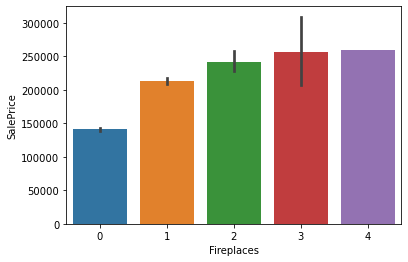

In [28]:
# create a bar plot to visualize the relationship between 'Fireplaces' and 'SalePrice'
sns.barplot(data=df, x='Fireplaces', y='SalePrice')

In [29]:
# convert 'Fireplaces' column to boolean: True if there are fireplaces (greater than 0), else False
df['Fireplaces'] = df['Fireplaces'] > 0

In [30]:
# calculate the top frequency (most common value) as a percentage for each column
top_freq_series = pd.Series({
    col: df[col].value_counts(normalize=True).values[0] * 100
    for col in df.columns
})

top_freq_series_sorted = top_freq_series.sort_values(ascending=False)

print(top_freq_series_sorted.head(50))

Utilities           99.897611
Street              99.590444
Condition 2         98.976109
Roof Matl           98.532423
Heating             98.464164
Garage Cond         96.174666
Kitchen AbvGr       95.426621
Land Slope          95.187713
Garage Qual         94.370263
Central Air         93.310580
Functional          93.105802
Bsmt Cond           91.789474
Electrical          91.567088
Paved Drive         90.511945
Land Contour        89.863481
BsmtFin Type 2      87.714988
Exter Cond          86.996587
Sale Type           86.552901
Condition 1         86.075085
Bldg Type           82.764505
Sale Condition      82.354949
Roof Style          79.215017
MS Zoning           77.576792
Lot Config          73.037543
Bsmt Exposure       66.947664
Lot Shape           63.447099
Garage Type         62.423368
Exter Qual          61.399317
Mas Vnr Type        60.268318
Overall Cond        56.450512
Garage Cars         54.728576
Bedroom AbvGr       54.505119
Full Bath           52.286689
Fireplaces

In [31]:
# select columns where the most common value appears in more than 90% of the rows
cols_to_drop = top_freq_series_sorted[top_freq_series_sorted > 90].index.tolist()

# drop these columns from the DataFrame
df = df.drop(columns=cols_to_drop)

In [32]:
# count the number of missing values in each column and display only columns with missing values
df.isna().sum()[df.isna().sum() != 0]

Lot Frontage        490
Mas Vnr Type         23
Bsmt Qual            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin Type 2       81
Bsmt Unf SF           1
Total Bsmt SF         1
Garage Type         157
Garage Yr Blt       159
Garage Finish       159
Garage Cars           1
Garage Area           1
Total BsmtFin SF      1
dtype: int64

In [33]:
# Identify columns with missing values
cols_with_na = df.columns[df.isna().sum() != 0]

# Display the data types of columns containing missing values
df.dtypes[cols_with_na]

Lot Frontage        float64
Mas Vnr Type         object
Bsmt Qual            object
Bsmt Exposure        object
BsmtFin Type 1       object
BsmtFin Type 2       object
Bsmt Unf SF         float64
Total Bsmt SF       float64
Garage Type          object
Garage Yr Blt       float64
Garage Finish        object
Garage Cars         float64
Garage Area         float64
Total BsmtFin SF    float64
dtype: object

In [34]:
# get the data types of columns with missing values
na_types = df.dtypes[cols_with_na]

# select columns with float64 data type and NaN values
float_cols = na_types[na_types == 'float64'].index.tolist()

# select columns with object data type and NaN values
object_cols = na_types[na_types == 'object'].index.tolist()

print("Float columns with NaN:", float_cols)
print("Object columns with NaN:", object_cols)

Float columns with NaN: ['Lot Frontage', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Total BsmtFin SF']
Object columns with NaN: ['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish']


In [35]:
# for each column with float64 data type and NaN values fill NaN values with the mode value
for col in float_cols:
    mode_value = df[col].mode()[0]
    
    df[col].fillna(mode_value, inplace=True)

In [36]:
# fill all remaining NaN values in the DataFrame with the string 'missing'
df = df.fillna('missing')

## Simplifying Categorical Columns

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MS SubClass       2930 non-null   int64  
 1   MS Zoning         2930 non-null   object 
 2   Lot Frontage      2930 non-null   float64
 3   Lot Area          2930 non-null   int64  
 4   Lot Shape         2930 non-null   object 
 5   Land Contour      2930 non-null   object 
 6   Lot Config        2930 non-null   object 
 7   Neighborhood      2930 non-null   object 
 8   Condition 1       2930 non-null   object 
 9   Bldg Type         2930 non-null   object 
 10  House Style       2930 non-null   object 
 11  Overall Qual      2930 non-null   int64  
 12  Overall Cond      2930 non-null   int64  
 13  Year Built        2930 non-null   int64  
 14  Year Remod/Add    2930 non-null   int64  
 15  Roof Style        2930 non-null   object 
 16  Exterior 1st      2930 non-null   object 


In [38]:
int_columns = list(df.select_dtypes(include='int'))
df[int_columns].nunique()

MS SubClass         16
Lot Area          1960
Overall Qual        10
Overall Cond         9
Year Built         118
Year Remod/Add      61
Gr Liv Area       1292
Full Bath            5
Bedroom AbvGr        8
TotRms AbvGrd       14
Mo Sold             12
Yr Sold              5
SalePrice         1032
Total Porch SF     372
dtype: int64

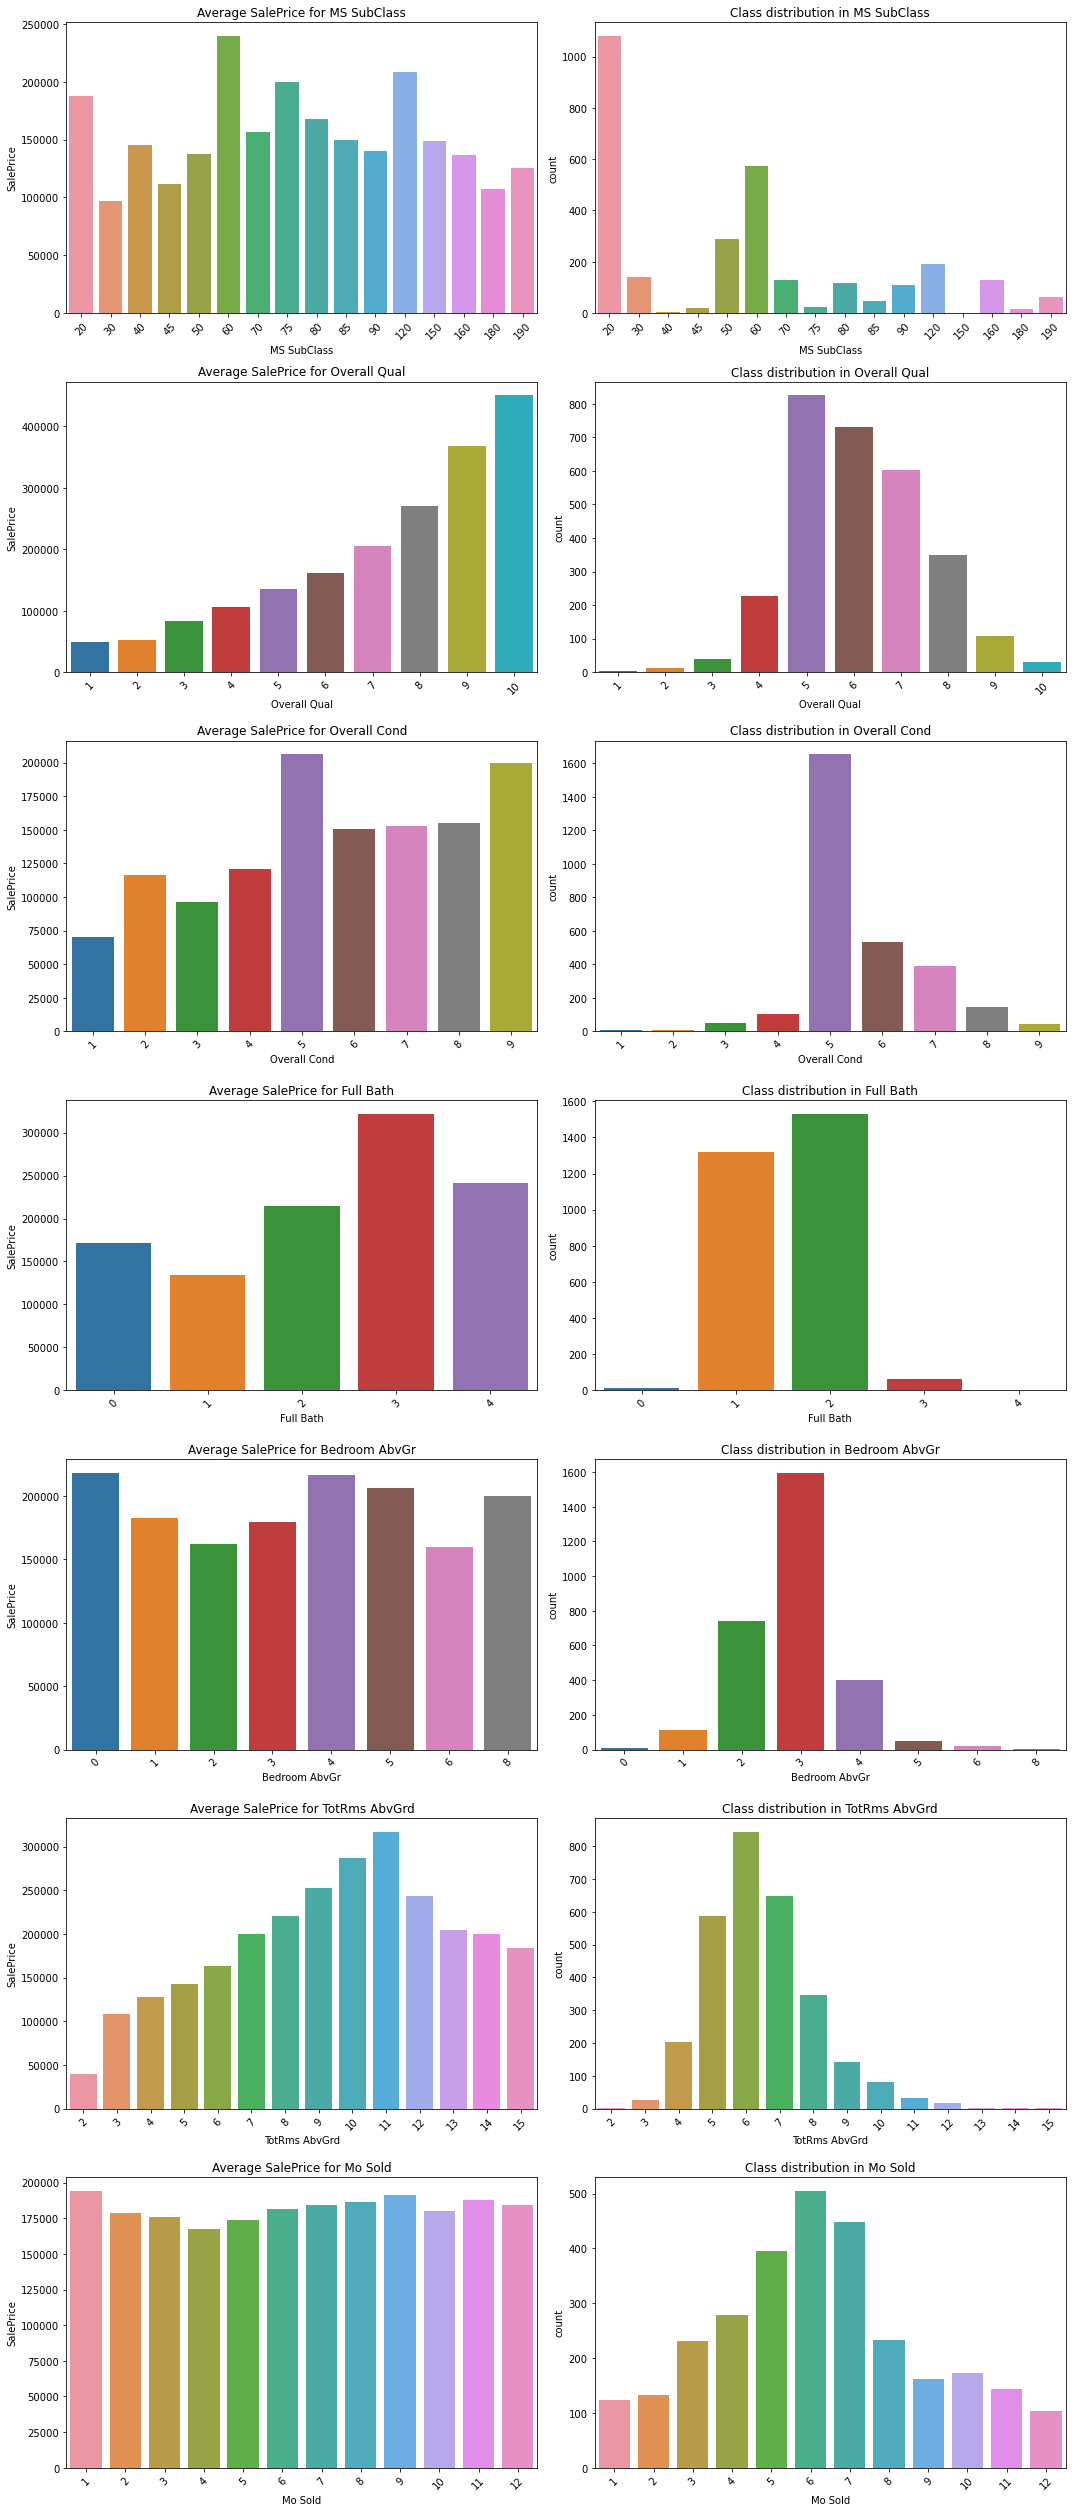

In [39]:
# visualize the relationship between selected integer features and 'SalePrice'
# left plots: mean 'SalePrice' for each category
# right plots: count of each category
int_columns = ['MS SubClass', 'Overall Qual', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Mo Sold']

fig, axes = plt.subplots(len(int_columns), 2, figsize=(15, 5 * len(int_columns)))

for i, col in enumerate(int_columns):
    sns.barplot(data=df, x=col, y='SalePrice', estimator=np.mean, ci=None, ax=axes[i, 0])
    axes[i, 0].set_title(f'Average SalePrice for {col}')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    sns.countplot(data=df, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Class distribution in {col}')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [40]:
df[int_columns] = df[int_columns].astype('object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MS SubClass       2930 non-null   object 
 1   MS Zoning         2930 non-null   object 
 2   Lot Frontage      2930 non-null   float64
 3   Lot Area          2930 non-null   int64  
 4   Lot Shape         2930 non-null   object 
 5   Land Contour      2930 non-null   object 
 6   Lot Config        2930 non-null   object 
 7   Neighborhood      2930 non-null   object 
 8   Condition 1       2930 non-null   object 
 9   Bldg Type         2930 non-null   object 
 10  House Style       2930 non-null   object 
 11  Overall Qual      2930 non-null   object 
 12  Overall Cond      2930 non-null   object 
 13  Year Built        2930 non-null   int64  
 14  Year Remod/Add    2930 non-null   int64  
 15  Roof Style        2930 non-null   object 
 16  Exterior 1st      2930 non-null   object 


In [42]:
float_columns = list(df.select_dtypes(include='float'))
df[float_columns].nunique()

Lot Frontage         128
Bsmt Unf SF         1137
Total Bsmt SF       1058
Garage Yr Blt        103
Garage Cars            6
Garage Area          603
Total BsmtFin SF    1001
Baths                 10
dtype: int64

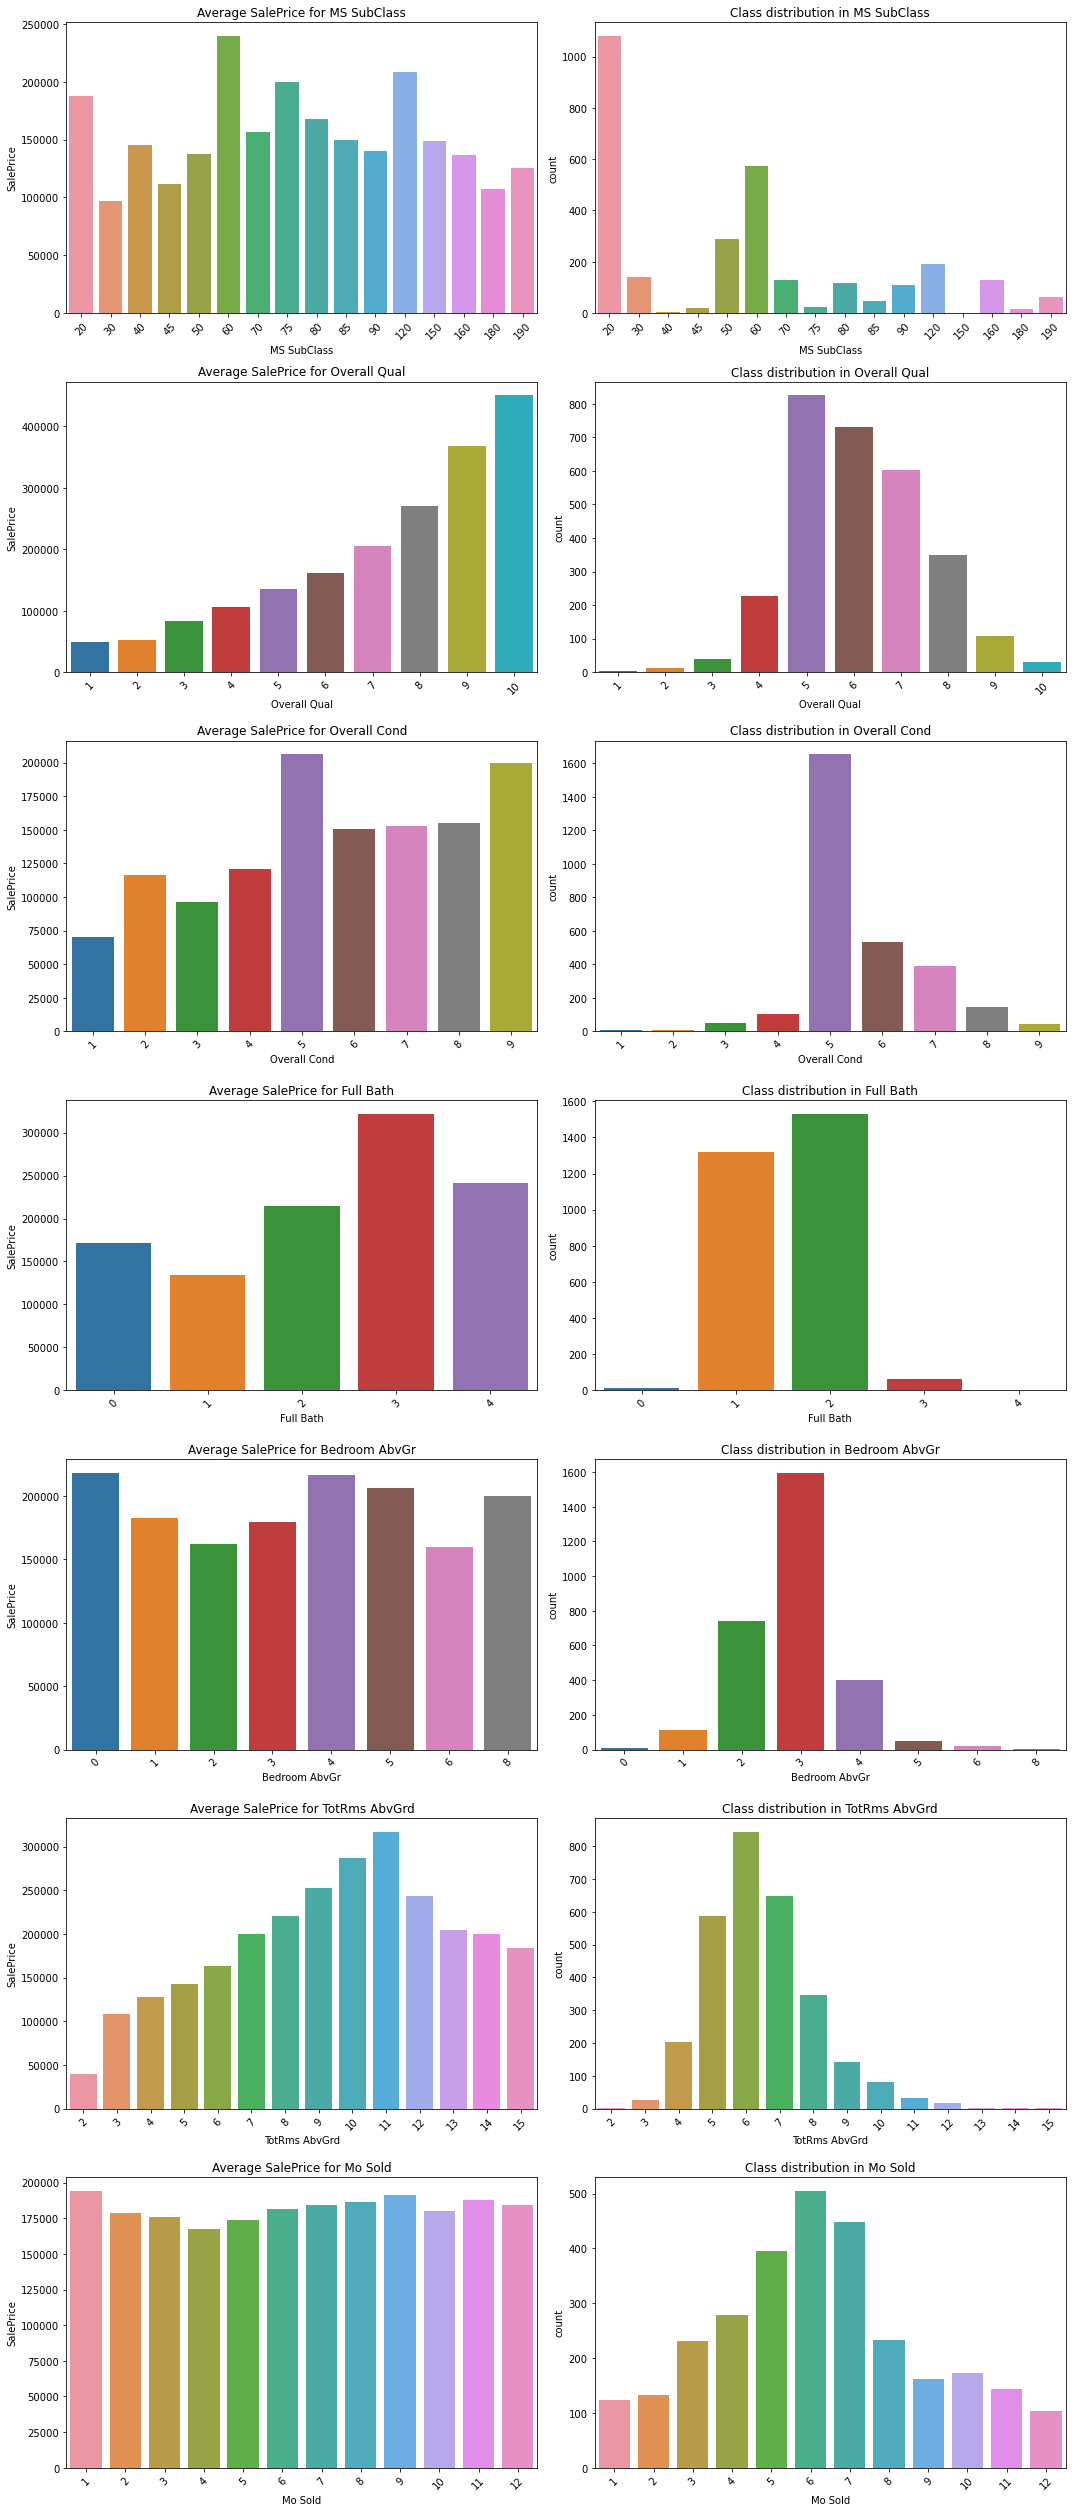

In [43]:
# visualize the relationship between selected integer features ('Garage Cars' and 'Baths') and 'SalePrice',
# including both the mean 'SalePrice' and the class distribution of these features
float_columns = ['Garage Cars', 'Baths']

fig, axes = plt.subplots(len(int_columns), 2, figsize=(15, 5 * len(int_columns)))

for i, col in enumerate(int_columns):
    sns.barplot(data=df, x=col, y='SalePrice', estimator=np.mean, ci=None, ax=axes[i, 0])
    axes[i, 0].set_title(f'Average SalePrice for {col}')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    sns.countplot(data=df, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Class distribution in {col}')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [44]:
df[float_columns] = df[float_columns].astype('object')

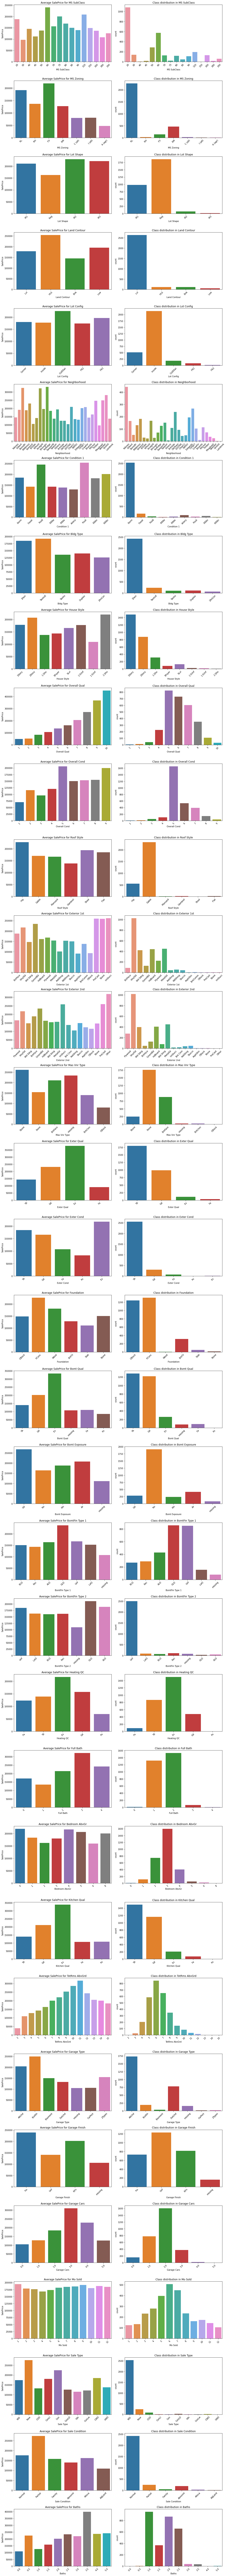

In [45]:
# visualize the mean 'SalePrice' and the count of categories for each object type column

object_columns = df.select_dtypes(include='object').columns.tolist()

fig, axes = plt.subplots(len(object_columns), 2, figsize=(15, 5 * len(object_columns)))

for i, col in enumerate(object_columns):
    sns.barplot(data=df, x=col, y='SalePrice', estimator=np.mean, ci=None, ax=axes[i, 0])
    axes[i, 0].set_title(f'Average SalePrice for {col}')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    sns.countplot(data=df, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Class distribution in {col}')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('..\\reports\\figures\\object_columns_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [46]:
object_columns

['MS SubClass',
 'MS Zoning',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Garage Type',
 'Garage Finish',
 'Garage Cars',
 'Mo Sold',
 'Sale Type',
 'Sale Condition',
 'Baths']

In [47]:
mean_totals = df.groupby('MS SubClass')['SalePrice'].mean()
bins = pd.cut(mean_totals, bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['MS SubClass'] = df['MS SubClass'].map(bins)

In [48]:
df['MS Zoning'] = df['MS Zoning'].isin(['RL', 'FV'])

In [49]:
df['Lot Shape'] = df['Lot Shape'].isin(['Reg'])

In [50]:
mean_totals = df.groupby('Land Contour')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Land Contour
HLS    253924.525000
Low    194882.733333
Lvl    178743.737942
Bnk    144754.589744
Name: SalePrice, dtype: float64

In [51]:
bins = pd.cut(mean_totals, bins=[0, 180000, mean_totals.max()], labels=['Low', 'High'])
df['Land Contour'] = df['Land Contour'].map(bins)

In [52]:
mean_totals = df.groupby('Lot Config')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Lot Config
CulDSac    225531.872222
FR3        196635.857143
Corner     179956.937378
Inside     177395.035514
FR2        174122.894118
Name: SalePrice, dtype: float64

In [53]:
bins = pd.cut(mean_totals, bins=[0, 178000, mean_totals.max()], labels=['Low', 'High'])
df['Lot Config'] = df['Lot Config'].map(bins)

In [54]:
mean_totals = df.groupby('Neighborhood')['SalePrice'].mean()
bins = pd.cut(mean_totals, bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['Neighborhood'] = df['Neighborhood'].map(bins)

In [55]:
mean_totals = df.groupby('Condition 1')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Condition 1
PosA      253917.500000
PosN      245720.410256
RRNn      201027.777778
Norm      184050.511102
RRAn      181413.000000
Feedr     142605.615854
RRNe      142558.333333
RRAe      138710.714286
Artery    129229.891304
Name: SalePrice, dtype: float64

In [56]:
bins = pd.cut(mean_totals, bins=[0, 150000, mean_totals.max()], labels=['Low', 'High'])
df['Condition 1'] = df['Condition 1'].map(bins)

In [57]:
mean_totals = df.groupby('Bldg Type')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Bldg Type
TwnhsE    192311.914163
1Fam      184812.041237
Duplex    139808.935780
Twnhs     135934.059406
2fmCon    125581.709677
Name: SalePrice, dtype: float64

In [58]:
bins = pd.cut(mean_totals, bins=[0, 150000, mean_totals.max()], labels=['Low', 'High'])
df['Bldg Type'] = df['Bldg Type'].map(bins)

In [59]:
df['House Style'] = df['House Style'].apply(lambda x: x if x in ['1Story', '2Story'] else 'Other')

In [60]:
def group_quality(x):
    if x in [1, 2, 3, 4]:
        return '1-4'
    elif x in [8, 9, 10]:
        return '8-10'
    else: 
        return str(x)
    
df['Overall Qual'] = df['Overall Qual'].apply(group_quality)

In [61]:
mean_totals = df.groupby('Overall Cond')['SalePrice'].mean().sort_values(ascending=False) 
bins = pd.cut(mean_totals, bins=3, labels=['Low', 'Medium', 'High'])
df['Overall Cond'] = df['Overall Cond'].map(bins)

In [62]:
mean_totals = df.groupby('Roof Style')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Roof Style
Hip        226689.517241
Shed       193200.000000
Flat       184798.500000
Gable      170311.854373
Mansard    166225.363636
Gambrel    138284.954545
Name: SalePrice, dtype: float64

In [63]:
bins = pd.cut(mean_totals, bins=[0, 180000, mean_totals.max()], labels=['Low', 'High'])
df['Roof Style'] = df['Roof Style'].map(bins)

In [64]:
mean_totals = df.groupby('Exterior 1st')['SalePrice'].mean()
bins = pd.cut(mean_totals, bins=3, labels=['Low', 'Medium', 'High'])
df['Exterior 1st'] = df['Exterior 1st'].map(bins)

In [65]:
mean_totals = df.groupby('Exterior 2nd')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Exterior 2nd
Other      319000.000000
PreCast    260000.000000
ImStucc    257946.666667
CmentBd    233229.015873
VinylSd    217126.563547
BrkFace    188160.638298
Plywood    164015.445255
HdBoard    161738.701970
MetalSd    155553.293065
Wd Shng    154001.851852
Stucco     148587.659574
Wd Sdng    146944.337531
Stone      145420.666667
Brk Cmn    137536.363636
AsphShn    124093.750000
CBlock     114666.666667
AsbShng    105225.000000
Name: SalePrice, dtype: float64

In [66]:
pd.cut(mean_totals, bins=2)

Exterior 2nd
Other        (212112.5, 319000.0]
PreCast      (212112.5, 319000.0]
ImStucc      (212112.5, 319000.0]
CmentBd      (212112.5, 319000.0]
VinylSd      (212112.5, 319000.0]
BrkFace    (105011.225, 212112.5]
Plywood    (105011.225, 212112.5]
HdBoard    (105011.225, 212112.5]
MetalSd    (105011.225, 212112.5]
Wd Shng    (105011.225, 212112.5]
Stucco     (105011.225, 212112.5]
Wd Sdng    (105011.225, 212112.5]
Stone      (105011.225, 212112.5]
Brk Cmn    (105011.225, 212112.5]
AsphShn    (105011.225, 212112.5]
CBlock     (105011.225, 212112.5]
AsbShng    (105011.225, 212112.5]
Name: SalePrice, dtype: category
Categories (2, interval[float64, right]): [(105011.225, 212112.5] < (212112.5, 319000.0]]

In [67]:
bins = pd.cut(mean_totals, bins=2, labels=['Low', 'High'])
df['Exterior 2nd'] = df['Exterior 2nd'].map(bins)

In [68]:
mean_totals = df.groupby('Mas Vnr Type')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Mas Vnr Type
Stone      260547.297189
missing    233348.739130
BrkFace    210798.592045
None       154338.711187
BrkCmn     140199.000000
CBlock      80000.000000
Name: SalePrice, dtype: float64

In [69]:
bins = pd.cut(mean_totals, bins=[0, 200000, mean_totals.max()], labels=['Low', 'High'])
df['Mas Vnr Type'] = df['Mas Vnr Type'].map(bins)

In [70]:
df['Exter Qual'] = df['Exter Qual'].apply(lambda x: x if x in ['Gd', 'Ex'] else 'Other')

In [71]:
mean_totals = df.groupby('Exter Cond')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Exter Cond
Ex    217699.750000
TA    184421.103570
Gd    165803.762542
Fa    107563.298507
Po     82866.666667
Name: SalePrice, dtype: float64

In [72]:
bins = pd.cut(mean_totals, bins=[0, 170000, mean_totals.max()], labels=['Low', 'High'])
df['Exter Cond'] = df['Exter Cond'].map(bins)

In [73]:
mean_totals = df.groupby('Foundation')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Foundation
PConc     227069.483969
Wood      180900.000000
Stone     149786.818182
CBlock    148284.153537
BrkTil    128107.276527
Slab      110457.693878
Name: SalePrice, dtype: float64

In [74]:
bins = pd.cut(mean_totals, bins=[0, 170000, mean_totals.max()], labels=['Low', 'High'])
df['Foundation'] = df['Foundation'].map(bins)

In [75]:
df['Bsmt Qual'] = df['Bsmt Qual'].apply(lambda x: x if x in ['Gd', 'Ex'] else 'Other')

In [76]:
mean_totals = df.groupby('Bsmt Exposure')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Bsmt Exposure
Gd         267507.644366
Av         207438.478469
Mn         187559.100418
No         164229.815845
missing    110871.650602
Name: SalePrice, dtype: float64

In [77]:
bins = pd.cut(mean_totals, bins=[0, 170000, mean_totals.max()], labels=['Low', 'High'])
df['Bsmt Exposure'] = df['Bsmt Exposure'].map(bins)

In [78]:
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].isin(['GLQ'])

In [79]:
mean_totals = df.groupby('BsmtFin Type 2')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

BsmtFin Type 2
GLQ        210585.294118
ALQ        188644.339623
Unf        184559.217687
LwQ        162617.134831
Rec        161613.443396
BLQ        160246.073529
missing    109385.654321
Name: SalePrice, dtype: float64

In [80]:
bins = pd.cut(mean_totals, bins=[0, 170000, mean_totals.max()], labels=['Low', 'High'])
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map(bins)

In [81]:
df['Heating QC'] = df['Heating QC'].isin(['Ex'])

In [82]:
mean_totals = df.groupby('Full Bath')['SalePrice'].mean().sort_values(ascending=False) 
mean_totals

Full Bath
3    322140.031250
4    241875.000000
2    214510.599869
0    171177.750000
1    134646.147193
Name: SalePrice, dtype: float64

In [83]:
bins = pd.cut(mean_totals, bins = [0, 180000, mean_totals.max()], labels=['Low', 'High'])
df['Full Bath'] = df['Full Bath'].map(bins)

In [84]:
mean_totals = df.groupby('Bedroom AbvGr')['SalePrice'].mean().sort_values(ascending=False) 
mean_totals

Bedroom AbvGr
0    218494.875000
4    216357.045000
5    206244.250000
8    200000.000000
1    183017.339286
3    179711.767063
2    162167.678331
6    159701.714286
Name: SalePrice, dtype: float64

In [85]:
pd.cut(mean_totals, bins=3, labels=['Low', 'Medium', 'High'])

Bedroom AbvGr
0      High
4      High
5      High
8      High
1    Medium
3    Medium
2       Low
6       Low
Name: SalePrice, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [86]:
bins = pd.cut(mean_totals, bins=3, labels=['Low', 'Medium', 'High'])
df['Bedroom AbvGr'] = df['Bedroom AbvGr'].map(bins)

In [87]:
df['Kitchen Qual'] = df['Kitchen Qual'].apply(lambda x: x if x in ['Gd', 'Ex'] else 'Other')

In [88]:
mean_totals = df.groupby('TotRms AbvGrd')['SalePrice'].mean().sort_values(ascending=False) 
mean_totals

TotRms AbvGrd
11    316893.406250
10    286435.462500
9     253019.853147
12    243136.625000
8     220044.850144
13    205000.000000
14    200000.000000
7     199646.898305
15    183850.000000
6     163129.086493
5     142555.269625
4     128106.000000
3     108715.384615
2      39300.000000
Name: SalePrice, dtype: float64

In [89]:
bins = pd.cut(mean_totals, bins = [0, 150000, 200001, 230000, mean_totals.max()], labels=['Very Low', 'Low', 'High', 'Very High'])
df['TotRms AbvGrd'] = df['TotRms AbvGrd'].map(bins)

In [90]:
mean_totals = df.groupby('Garage Type')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Garage Type
BuiltIn    249344.150538
Attchd     203772.283651
2Types     154639.130435
Basment    150473.416667
Detchd     132468.471867
CarPort    105566.666667
missing    104949.254777
Name: SalePrice, dtype: float64

In [91]:
bins = pd.cut(mean_totals, bins=[0, 170000, mean_totals.max()], labels=['Low', 'High'])
df['Garage Type'] = df['Garage Type'].map(bins)

In [92]:
mean_totals = df.groupby('Garage Finish')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Garage Finish
Fin        239820.456044
RFn        202619.366995
Unf        141209.013810
missing    105584.540881
Name: SalePrice, dtype: float64

In [93]:
bins = pd.cut(mean_totals, bins=[0, 170000, mean_totals.max()], labels=['Low', 'High'])
df['Garage Finish'] = df['Garage Finish'].map(bins)

In [94]:
mean_totals = df.groupby('Garage Cars')['SalePrice'].mean().sort_values(ascending=False) 
mean_totals

Garage Cars
3.0    310304.622995
4.0    228748.687500
2.0    183541.745636
1.0    127267.422879
5.0    126500.000000
0.0    104949.254777
Name: SalePrice, dtype: float64

In [95]:
pd.cut(mean_totals, bins=3, labels=['Low', 'Medium', 'High'])

Garage Cars
3.0      High
4.0    Medium
2.0    Medium
1.0       Low
5.0       Low
0.0       Low
Name: SalePrice, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [96]:
bins = pd.cut(mean_totals, bins=3, labels=['Low', 'Medium', 'High'])
df['Garage Cars'] = df['Garage Cars'].map(bins)

In [97]:
mean_totals = df.groupby('Mo Sold')['SalePrice'].mean().sort_values(ascending=False) 
mean_totals

Mo Sold
1     194210.016260
9     191552.142857
11    187651.265734
8     186222.463519
12    184454.048077
7     184366.864143
6     181542.562376
10    180057.063584
2     178364.345865
3     176130.461207
5     173700.215190
4     167711.989247
Name: SalePrice, dtype: float64

In [98]:
pd.cut(mean_totals, bins=3, labels=['Low', 'Medium', 'High'])

Mo Sold
1       High
9       High
11      High
8       High
12    Medium
7     Medium
6     Medium
10    Medium
2     Medium
3        Low
5        Low
4        Low
Name: SalePrice, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [99]:
bins = pd.cut(mean_totals, bins=3, labels=['Low', 'Medium', 'High'])
df['Mo Sold'] = df['Mo Sold'].map(bins)

In [100]:
mean_totals = df.groupby('Sale Type')['SalePrice'].mean().sort_values(ascending=False)
mean_totals

Sale Type
New      275751.309623
Con      224446.000000
CWD      184237.500000
ConLI    180105.555556
WD       174361.935331
VWD      137000.000000
COD      132248.287356
ConLD    125748.192308
ConLw    121937.500000
Oth      114920.142857
Name: SalePrice, dtype: float64

In [101]:
df = df.drop(['Sale Type'], axis=1)

In [102]:
df['Sale Condition'] = df['Sale Condition'].isin(['Partial'])

In [103]:
mean_totals = df.groupby('Baths')['SalePrice'].mean().sort_values(ascending=False) 
mean_totals

Baths
3.5    397995.545455
5.0    241875.000000
4.0    235876.000000
2.5    233398.389985
0.5    225000.000000
3.0    219825.825000
2.0    200636.191024
1.5    157912.778082
1.0    125501.924290
0.0    108103.666667
Name: SalePrice, dtype: float64

In [104]:
bins = pd.cut(mean_totals, bins = [0, 200000, mean_totals.max()], labels=['Low', 'High'])
df['Baths'] = df['Baths'].map(bins)

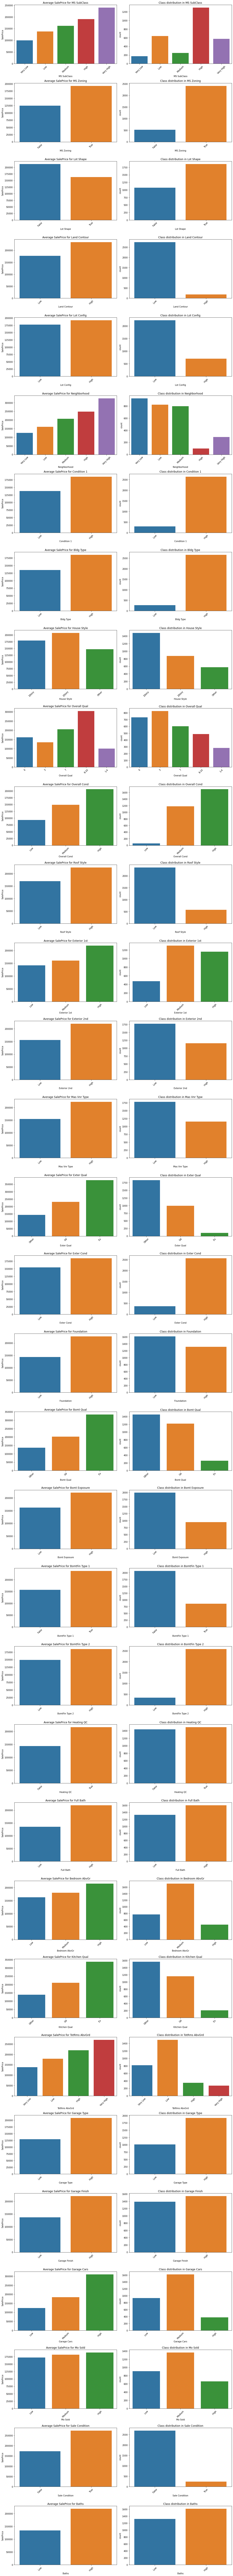

In [105]:
object_columns = [col for col in object_columns if col in df.columns]

fig, axes = plt.subplots(len(object_columns), 2, figsize=(15, 5 * len(object_columns)))

for i, col in enumerate(object_columns):
    sns.barplot(data=df, x=col, y='SalePrice', estimator=np.mean, ci=None, ax=axes[i, 0])
    axes[i, 0].set_title(f'Average SalePrice for {col}')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    sns.countplot(data=df, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Class distribution in {col}')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('..\\reports\\figures\\object_columns_analysis_after_transformation.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Numerical Data Transformation

In [106]:
df = df.rename(columns={'Year Remod/Add': 'YearRemodAdd'})

In [107]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['Lot Frontage', 'Lot Area', 'Year Built', 'YearRemodAdd', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Gr Liv Area', 'Garage Yr Blt', 'Garage Area',
       'Yr Sold', 'SalePrice', 'Total Porch SF', 'Total BsmtFin SF'],
      dtype='object')

In [108]:
df[df['Garage Yr Blt'] > 2010]['Garage Yr Blt']

2260    2207.0
Name: Garage Yr Blt, dtype: float64

In [109]:
df.loc[df['Garage Yr Blt'] == 2207, 'Garage Yr Blt'] = 2007

In [110]:
df['Year Built'] = df['Year Built'].max() - df['Year Built']
df['YearRemodAdd'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Garage Yr Blt'] = df['Garage Yr Blt'].max() - df['Garage Yr Blt']
df['Yr Sold'] = df['Yr Sold'].max() - df['Yr Sold']

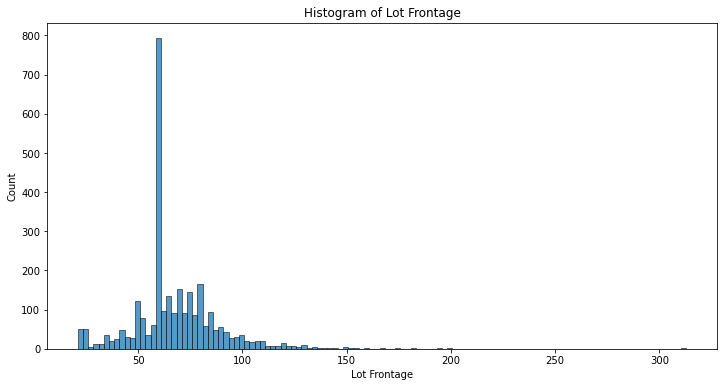

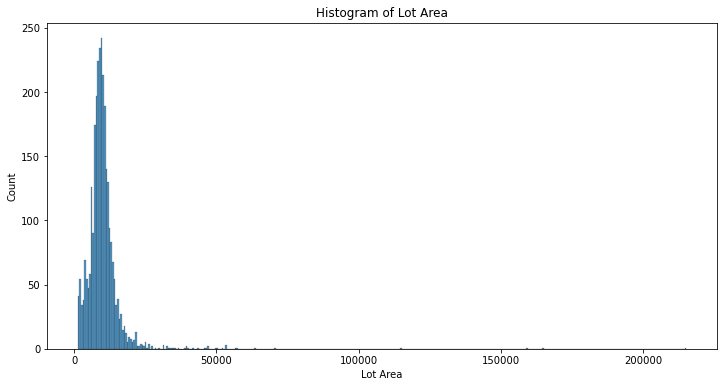

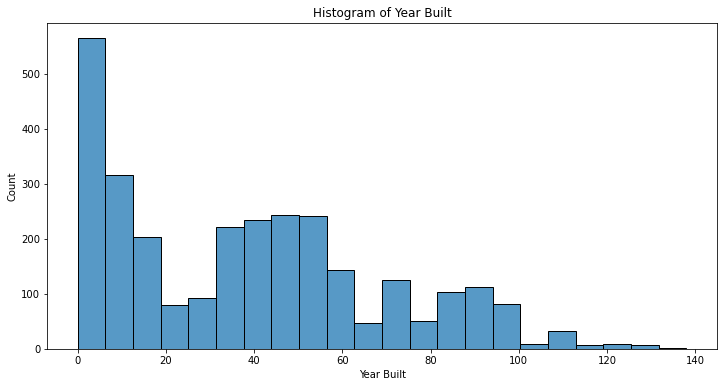

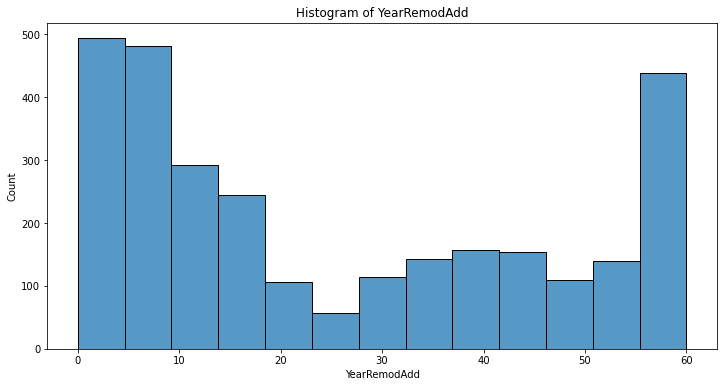

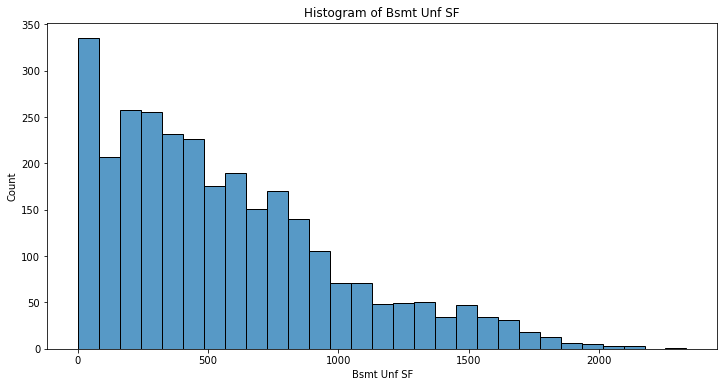

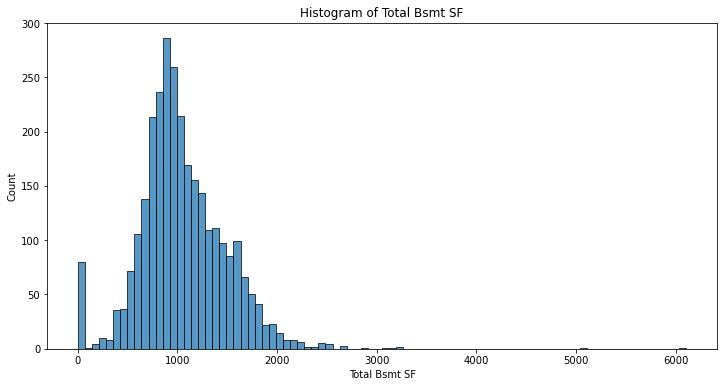

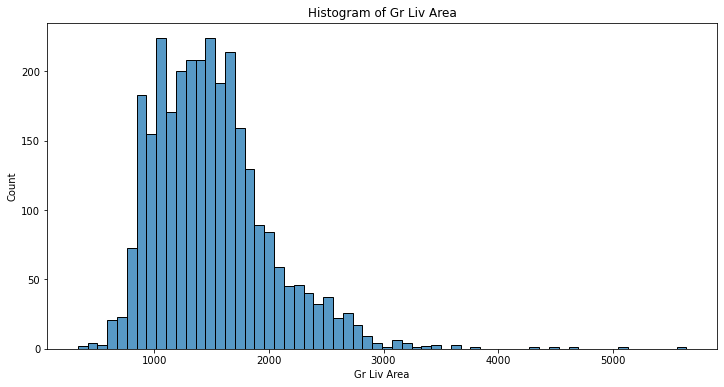

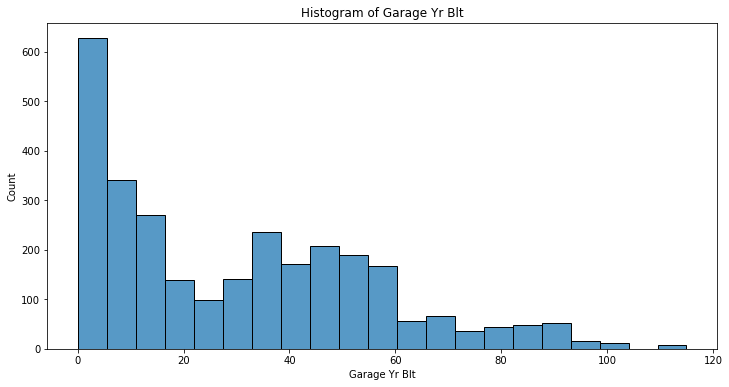

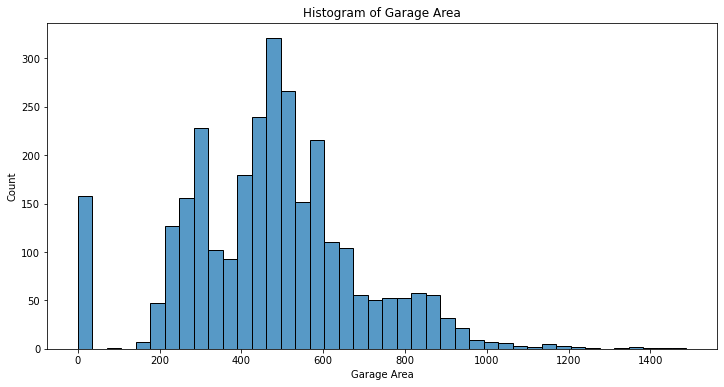

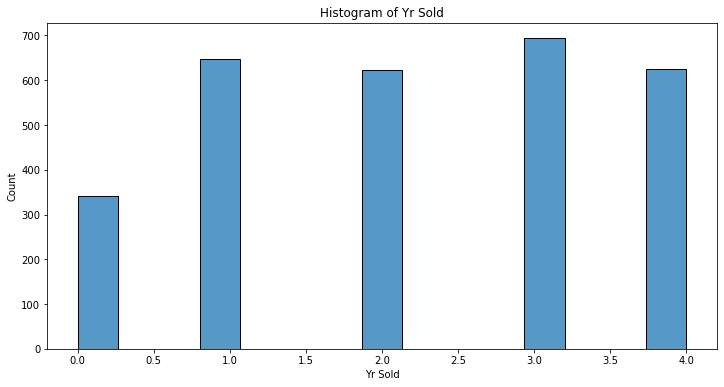

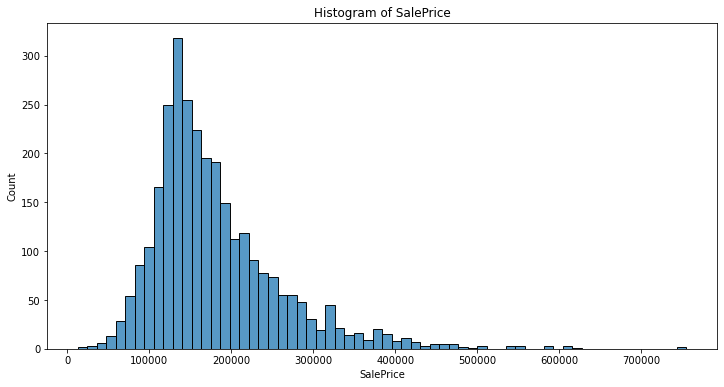

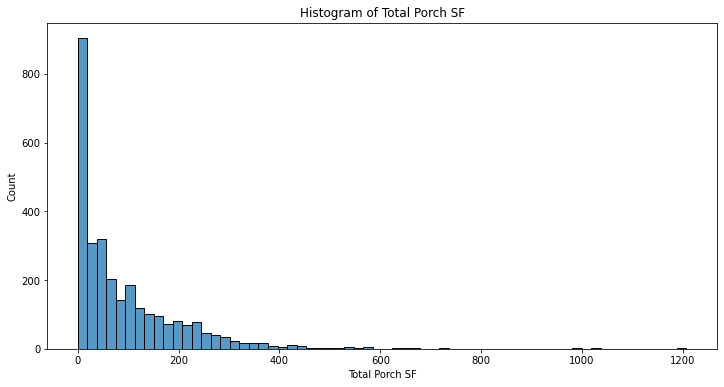

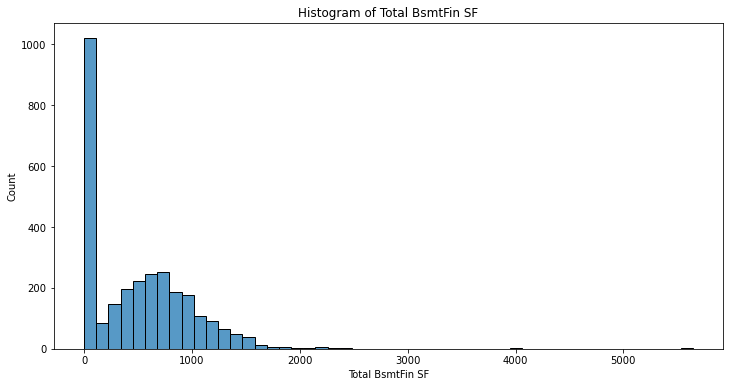

In [111]:
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')
    plt.savefig(f'..\\reports\\figures\\Histogram of {col}.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

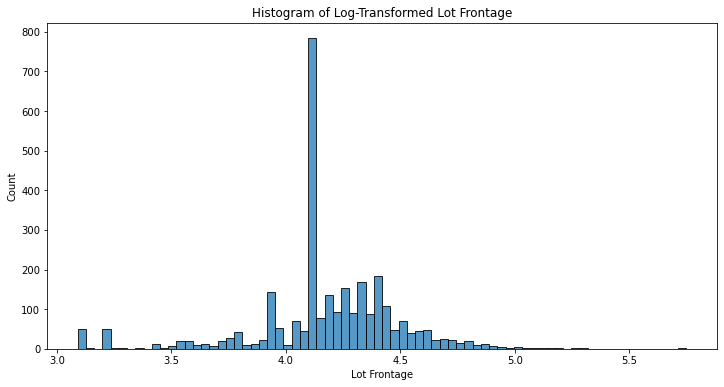

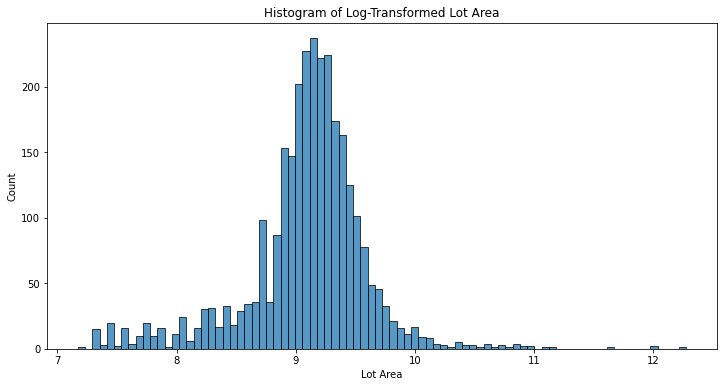

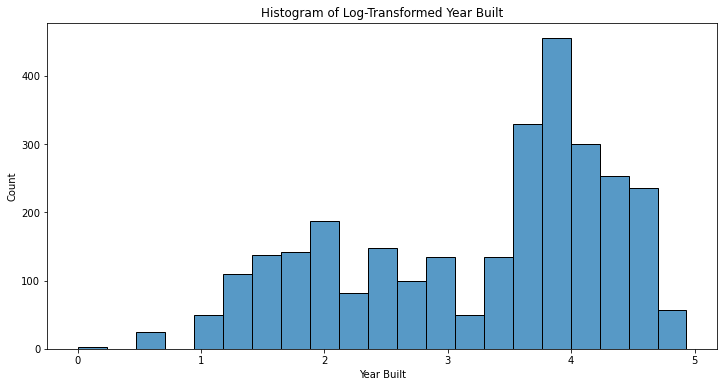

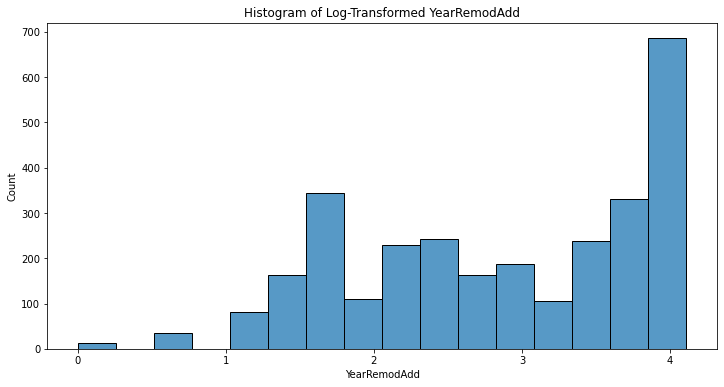

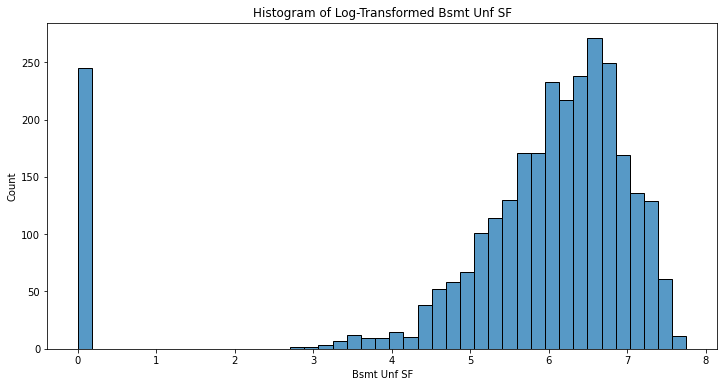

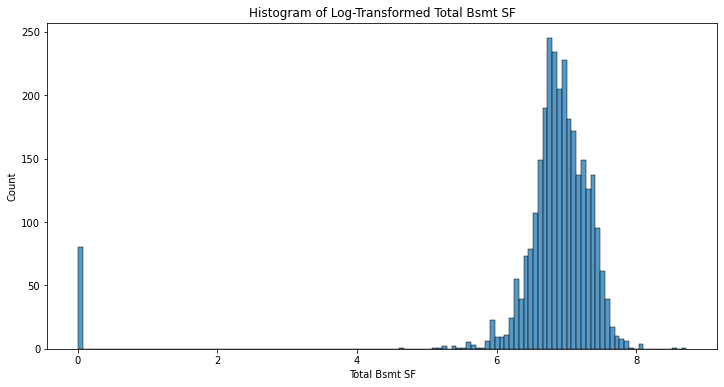

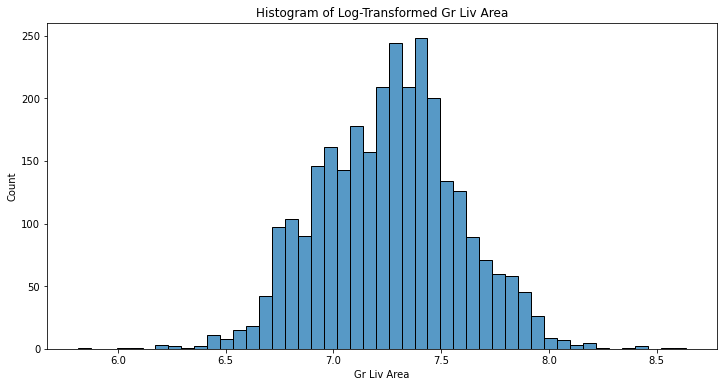

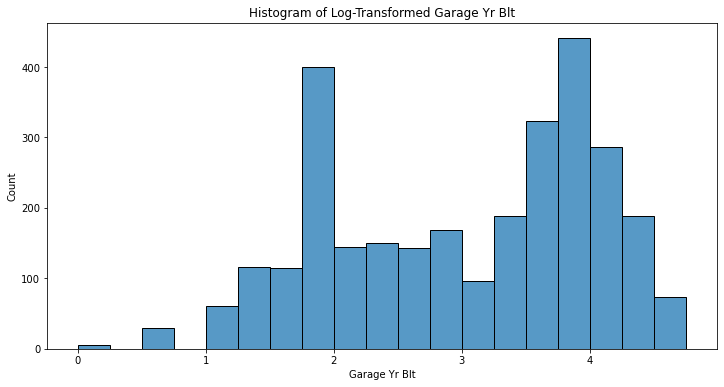

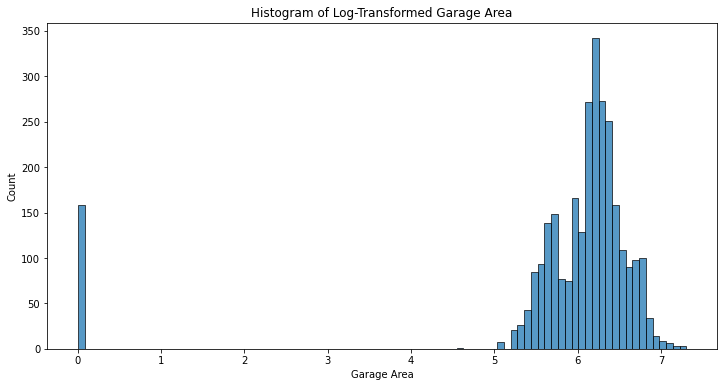

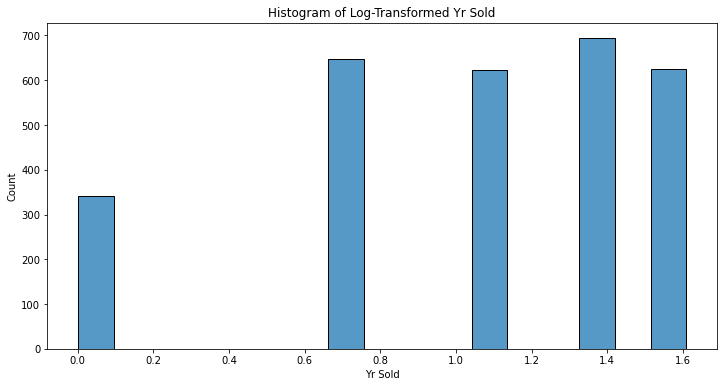

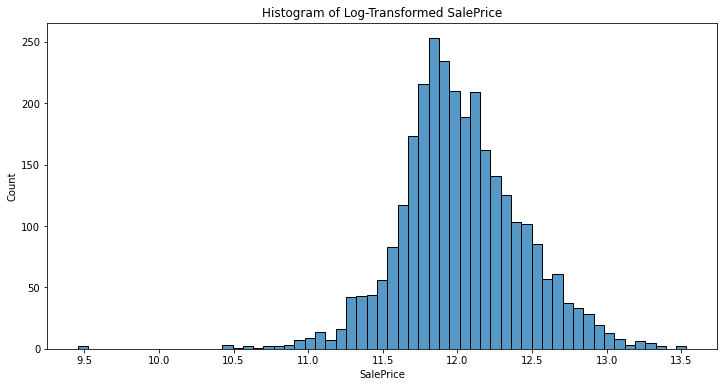

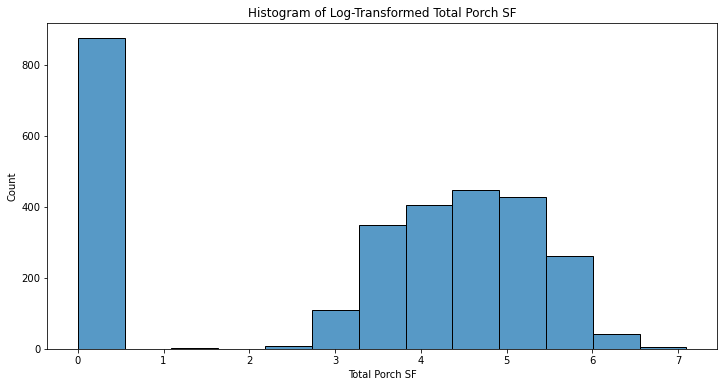

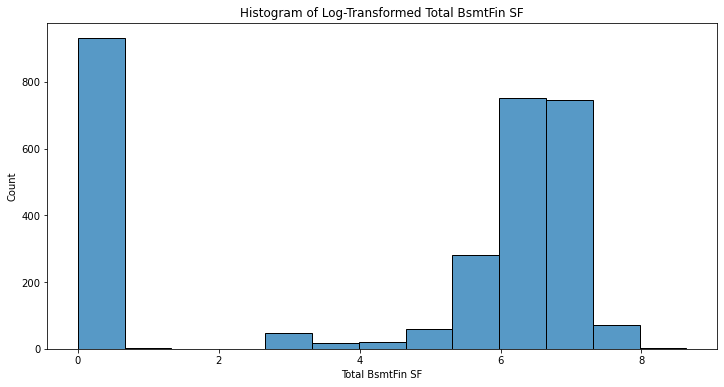

In [112]:
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(np.log1p(df[col]))
    plt.title(f'Histogram of Log-Transformed {col}')
    plt.savefig(f'..\\reports\\figures\\Histogram of Log-Transformed {col}.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

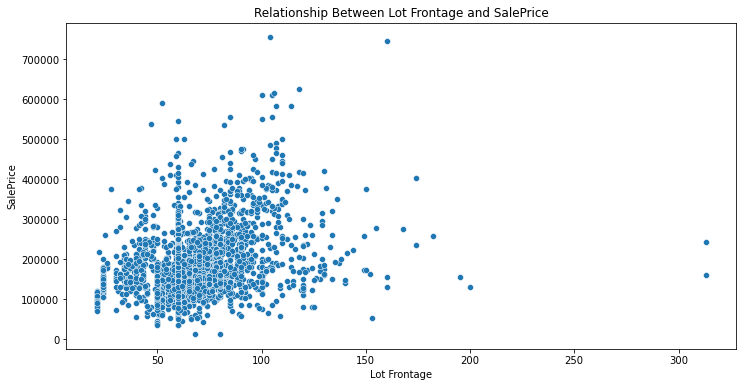

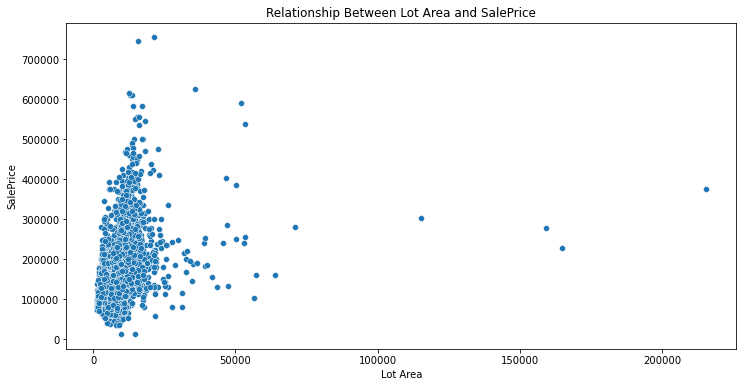

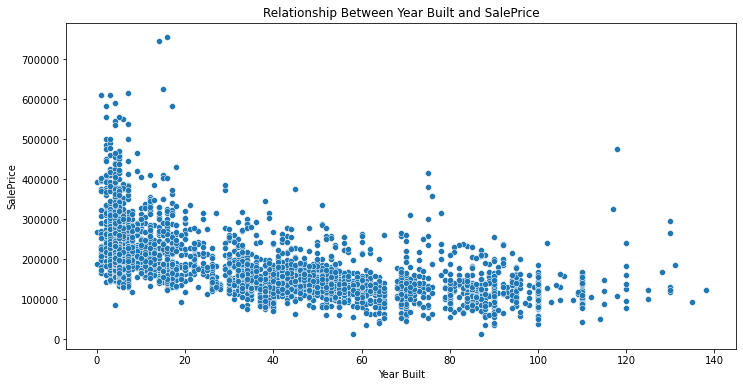

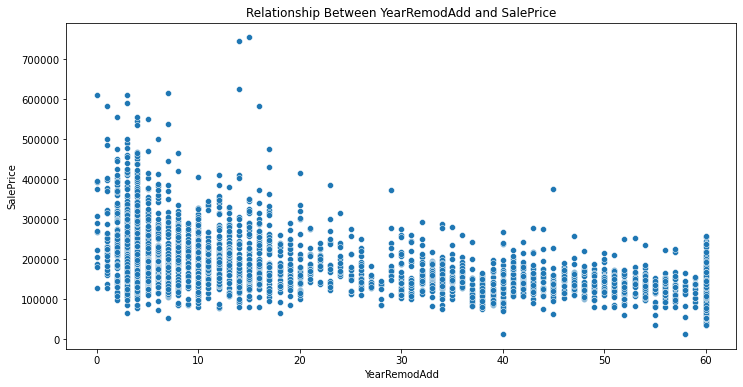

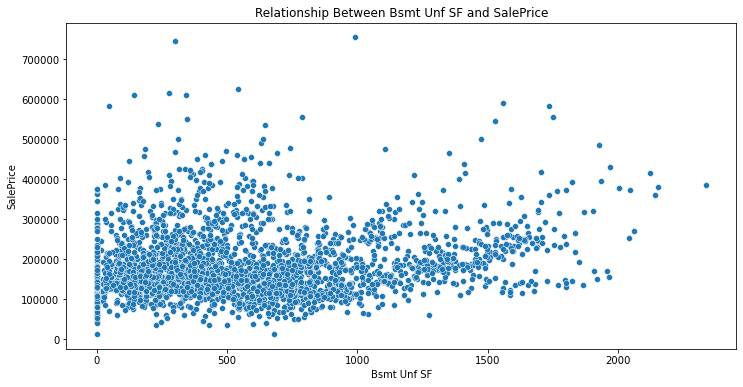

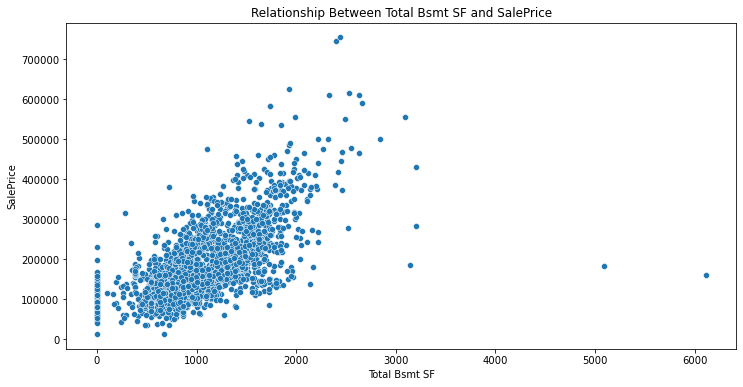

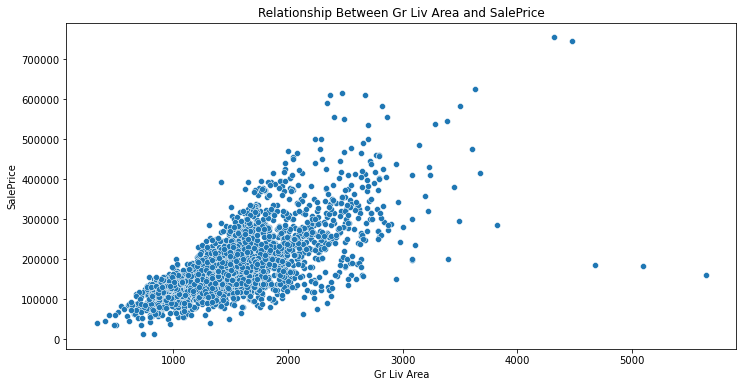

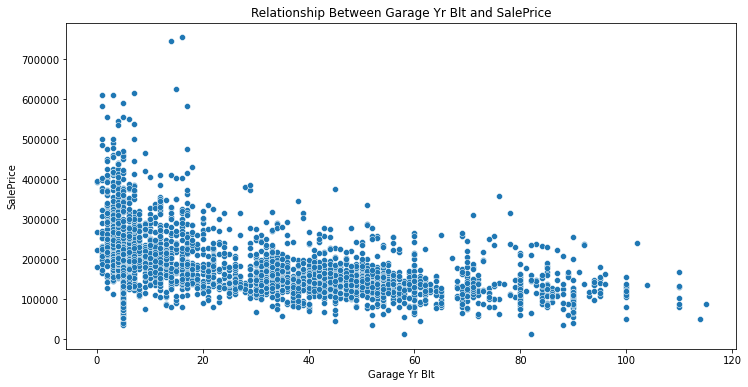

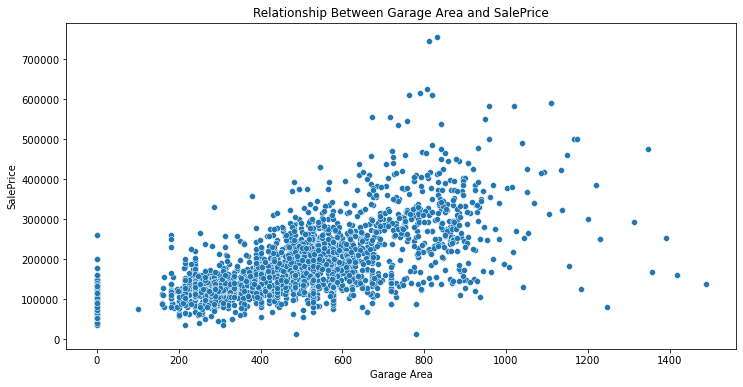

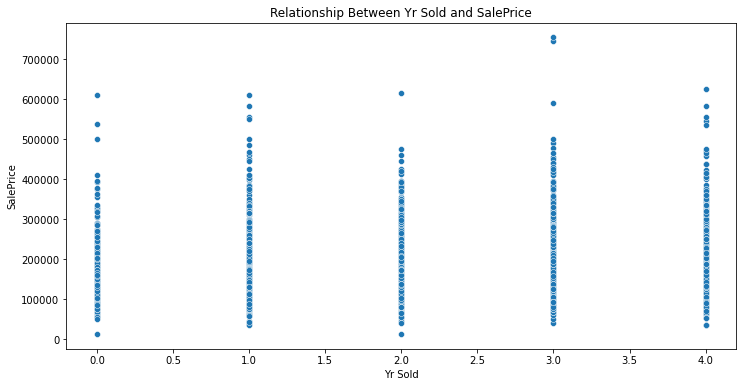

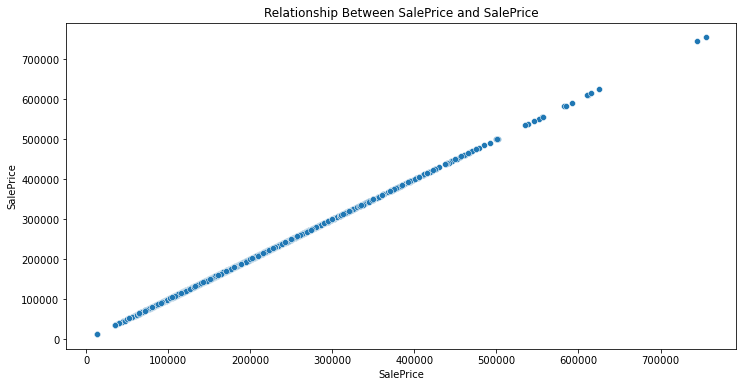

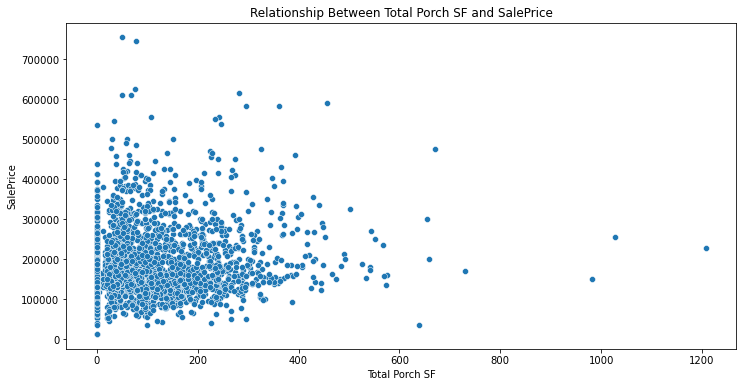

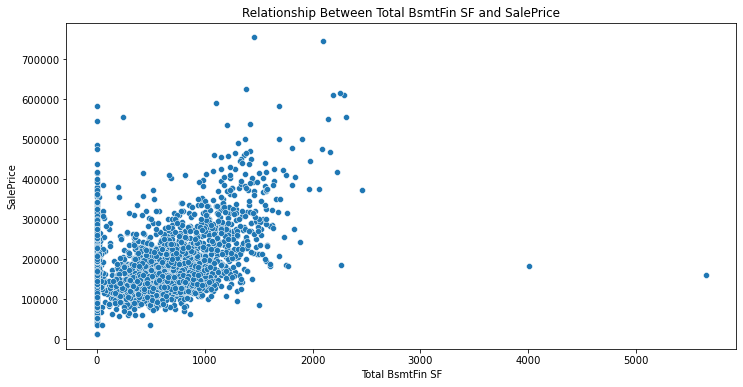

In [113]:
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x=col, y='SalePrice')
    plt.title(f'Relationship Between {col} and SalePrice')
    plt.savefig(f'..\\reports\\figures\\Relationship Between {col} and SalePrice.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

In [114]:
df = df.drop('Yr Sold', axis=1)

In [115]:
columns_to_log = ['Lot Frontage', 'Lot Area','Bsmt Unf SF', 'Total Bsmt SF', 'Gr Liv Area','Garage Area','Total Porch SF', 'Total BsmtFin SF']
df[columns_to_log] = df[columns_to_log].apply(np.log1p)

In [116]:
df['SalePrice'] = np.log(df['SalePrice'])

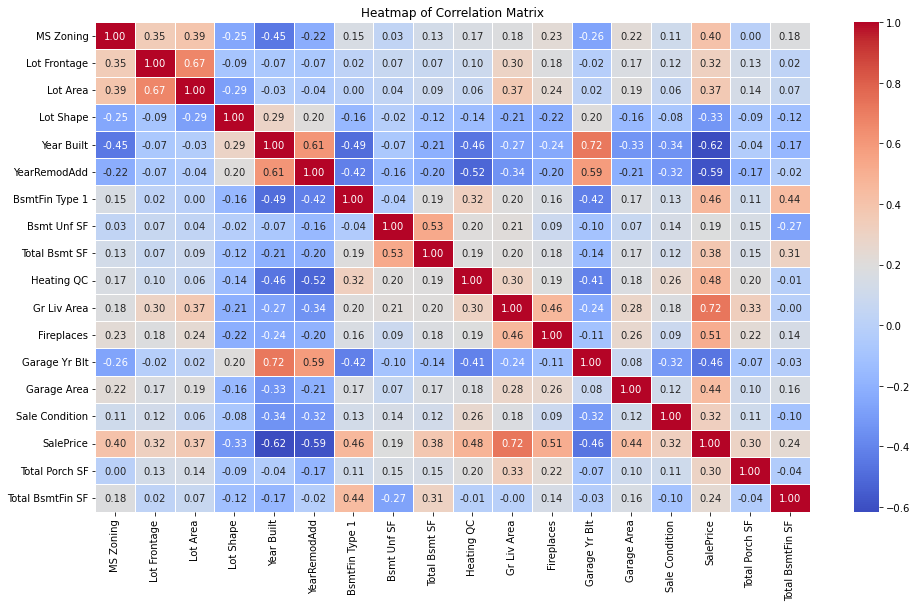

In [117]:
# Create a heatmap of the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(16, 9))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Heatmap of Correlation Matrix")
plt.savefig(f'..\\reports\\figures\\Heatmap of Correlation Matrix.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [119]:
X = pd.get_dummies(df, drop_first=True).drop('SalePrice', axis=1)
y = df['SalePrice']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [121]:
param_grids = {
    "LinearRegression": {},
    "Lasso": {
        "alpha": [0.01, 0.1, 1, 10]
    },
    "RandomForestRegressor": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "max_features": ["auto", "sqrt"]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 6, 9],
        "learning_rate": [0.01, 0.05, 0.1]
    },
    "KNeighborsRegressor": {
        "n_neighbors": [3, 5, 10, 20, 50],
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    }
}

models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "XGBoost": XGBRegressor(random_state=0, verbosity=0),
    "KNeighborsRegressor": KNeighborsRegressor()
}

In [122]:
best_models = {}

for name in models:
    print(f"Training {name}...")
    params = param_grids.get(name, {})
    grid = GridSearchCV(models[name], param_grid=params, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"R^2 on the test set: {grid.score(X_test, y_test):.4f}\n")

Training LinearRegression...
Best parameters for LinearRegression: {}
R^2 on the test set: 0.8860

Training Lasso...
Best parameters for Lasso: {'alpha': 0.01}
R^2 on the test set: 0.8351

Training RandomForestRegressor...
Best parameters for RandomForestRegressor: {'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300}
R^2 on the test set: 0.8606

Training XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
R^2 on the test set: 0.8936

Training KNeighborsRegressor...
Best parameters for KNeighborsRegressor: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
R^2 on the test set: 0.7736



In [123]:
for name, model in best_models.items():
    y_pred_log = model.predict(X_test)

    y_pred_real = np.exp(y_pred_log)
    y_test_real = np.exp(y_test)

    rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)
    print(f"RMSE on original scale for {name}: {rmse:.4f}")

RMSE on original scale for LinearRegression: 33800.1237
RMSE on original scale for Lasso: 37332.8188
RMSE on original scale for RandomForestRegressor: 33156.7570
RMSE on original scale for XGBoost: 27627.2353
RMSE on original scale for KNeighborsRegressor: 39516.0168


In [124]:
from xgboost import plot_importance

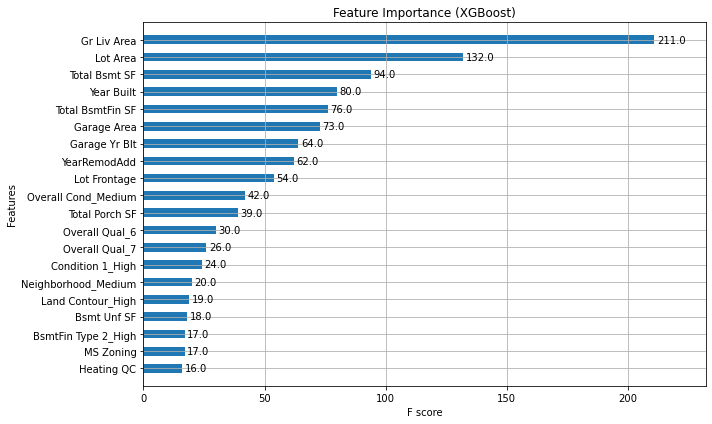

In [137]:
xgb_model = best_models["XGBoost"]
ax = plot_importance(xgb_model, max_num_features=20, height=0.5)
fig = ax.figure
fig.set_size_inches(10, 6) 
plt.title("Feature Importance (XGBoost)")
plt.tight_layout()
plt.savefig("..\\reports\\figures\\feature_importance_xgboost.png", dpi=300, facecolor='white') 
plt.show()